Dataset info: Sample dataset containing Telco customer data

In [3]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from imblearn.combine import SMOTEENN
#from sklearn.metrics import classfication_report

In [4]:
#Loading the data
df=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

#look at the top 5 records of the data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
#check various attributes of the data rows and columns
df.shape

(7043, 21)

In [6]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [7]:
#Concise summary of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
#check the descriptive statistics of the numeric variable
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


75% of the customers have tenure less than 55 months

Avg monthly charges are uSD 64 whereas 25% customerpay more than USD 89.95 per month

Text(0.5, 1.0, 'Count of target variable per category')

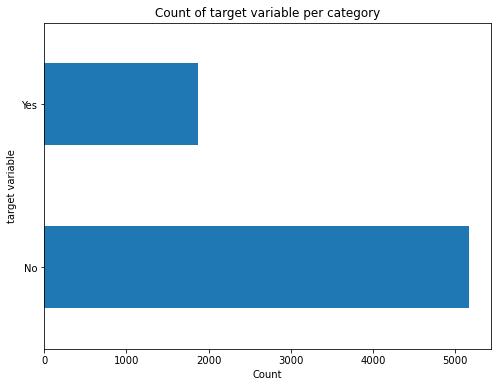

In [9]:
df['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel("Count")
plt.ylabel("target variable")
plt.title("Count of target variable per category")

In [10]:
100*df['Churn'].value_counts()/len(df['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Data is highly imbalanced, ratio 73:27

So we analyse the data with other features while taking the target variables separately to get some insights

C:\Users\Jainendra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


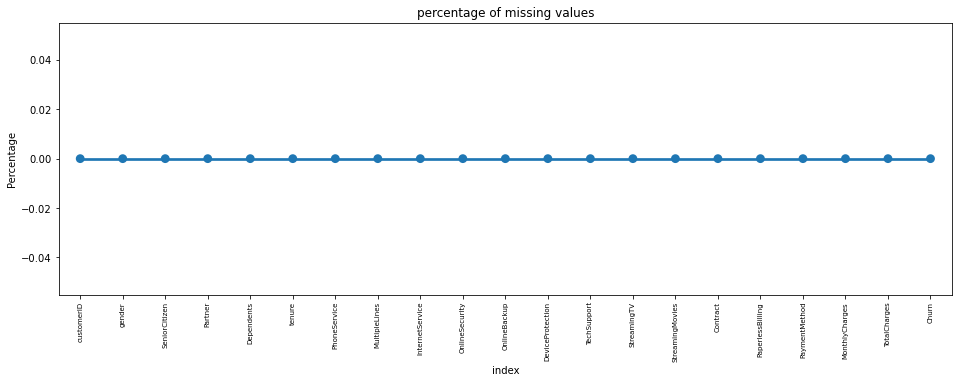

In [11]:
#finding the percentage of missing values
missing=pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax=sns.pointplot('index',0,data=missing)
plt.xticks(rotation=90,fontsize=7)
plt.title("percentage of missing values")
plt.ylabel("Percentage")
plt.show()

# Data Cleaning

In [12]:
#create a copy of base data for manupulation and processing
telco_data=df.copy()

In [13]:
#"Total Charges" should be numberic. So, lets convert it to numeric
telco_data.TotalCharges=pd.to_numeric(telco_data.TotalCharges,errors='coerce')
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

As we can see that there are 11 missing values in TotalCharges column. Let's see that column

In [14]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Since the percentage of these records as compared to total dataset in very low.It is safe to ignore them for further processing

In [15]:
#Removing missing values
telco_data.dropna(how='any', inplace=True)

In [16]:
telco_data['tenure'].max()

72

Divide customer into bins based on tenure. Eg: For tenure <12 months: assign a tenure group if 1-12, for tenure between 1 to 2 years , tenure group of 13-24 and so on..

In [17]:
#Group the tenure in bins of 12 months
labels =["{0}-{1}".format(i,i+11) for i in range(1,72,12)]

telco_data['tenure_group']=pd.cut(telco_data.tenure, range(1,80,12), right=False, labels=labels)

In [18]:
telco_data["tenure_group"].value_counts()

1-12     2175
61-72    1407
13-24    1024
25-36     832
49-60     832
37-48     762
Name: tenure_group, dtype: int64

In [19]:
#Removing the columns("customerID","Tenure") that is not required for processing
telco_data.drop(columns=['customerID','tenure'],axis=1,inplace=True)
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


# Univariate Analysis

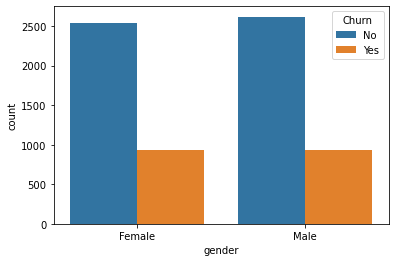

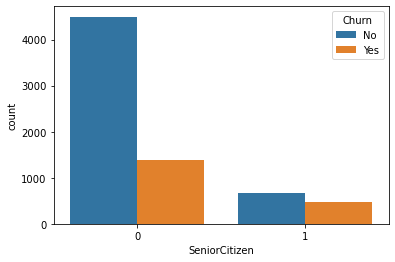

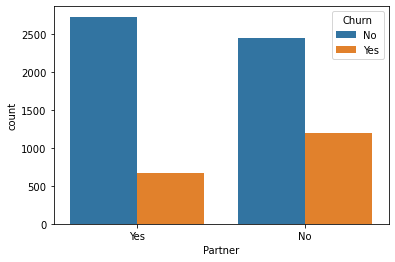

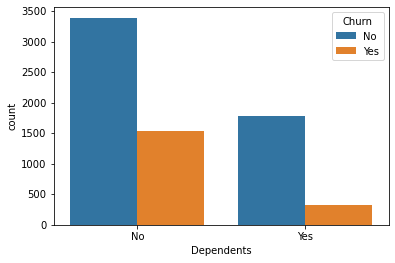

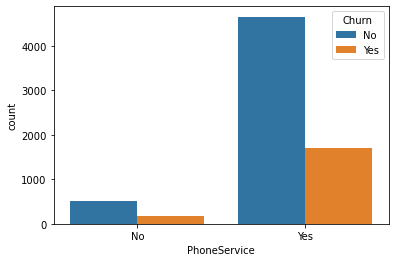

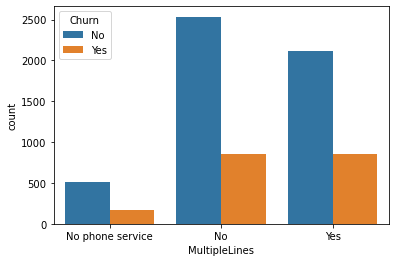

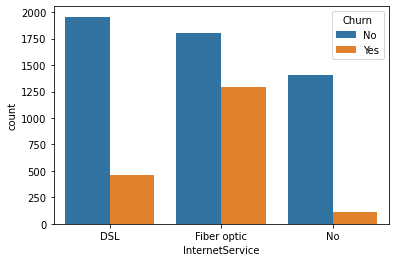

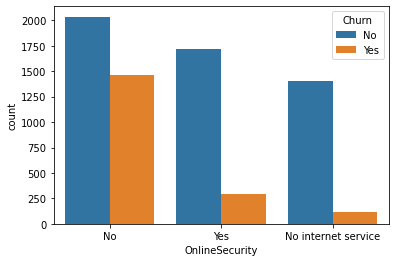

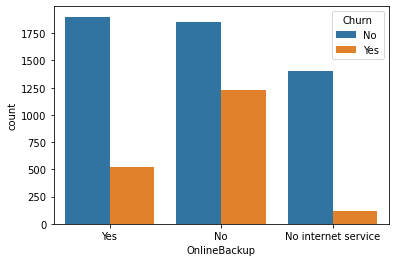

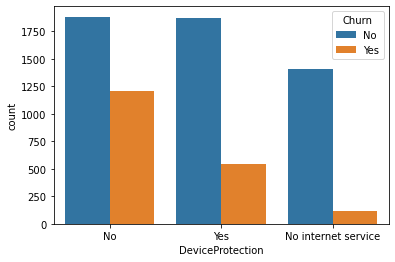

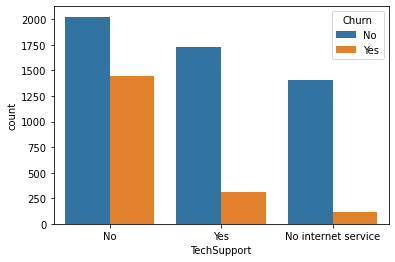

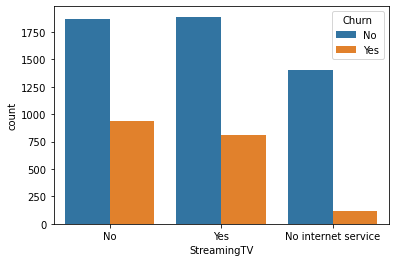

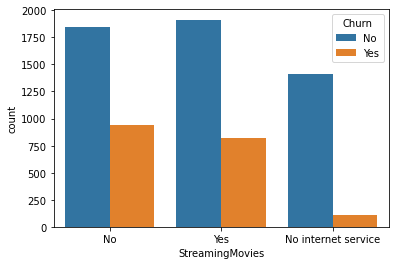

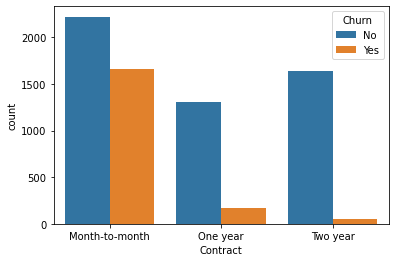

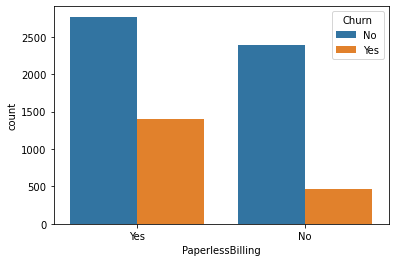

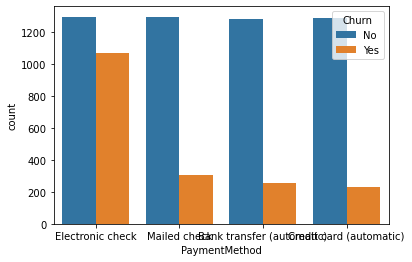

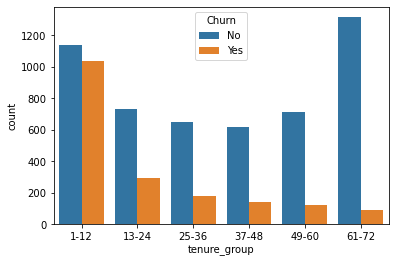

In [20]:
for i , predictor in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=telco_data, x=predictor, hue='Churn')

In [21]:
#converting the target variable "Churn" in a binary numeric variable ie: Yes=1, No=0
telco_data['Churn']=np.where(telco_data.Churn == 'Yes',1,0)

In [22]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1-12


In [23]:
#Convert all the categorical variable into dummy variables
telco_data_dummies=pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


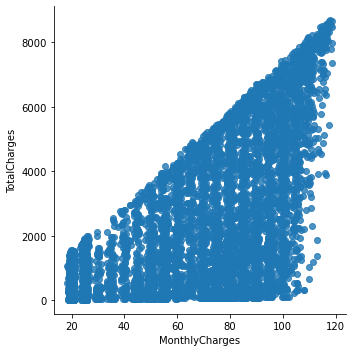

In [24]:
#relationship between "monthlyCharges" and "totalCharges"
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges',y='TotalCharges',fit_reg=False)

Total Charges increases as Monthly charges increase

Text(0.5, 1.0, 'Monthly charges by churn')

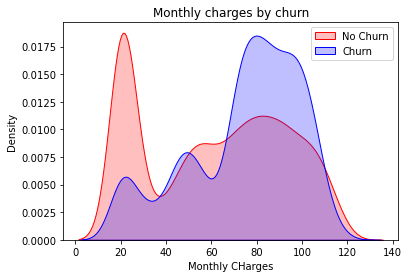

In [25]:
#Churn by MonthlyCharges and TotalCharges
mth =  sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn']==0)], color='Red',shade=True)
mth =  sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies['Churn']==1)], ax=mth,color='Blue',shade=True)
mth.legend(["No Churn","Churn"],loc="upper right")
mth.set_ylabel('Density')
mth.set_xlabel('Monthly CHarges')
mth.set_title("Monthly charges by churn")

Churn is high when monthly charges are high

<AxesSubplot:>

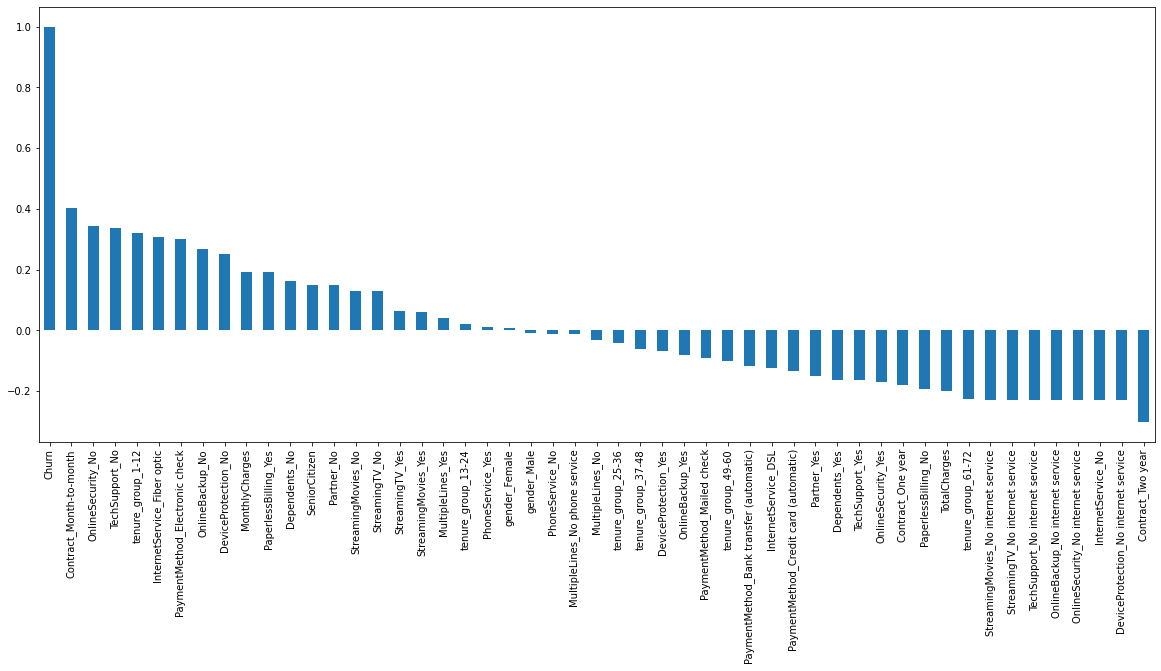

In [26]:
#Build the correlation of all predictors with CHurn

plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

High Churn we can see in month to Month contracts,NO online security, No tech support and some other features as well.

Low Churn we can see in Long term contracts, Subscription without internet service.


<AxesSubplot:>

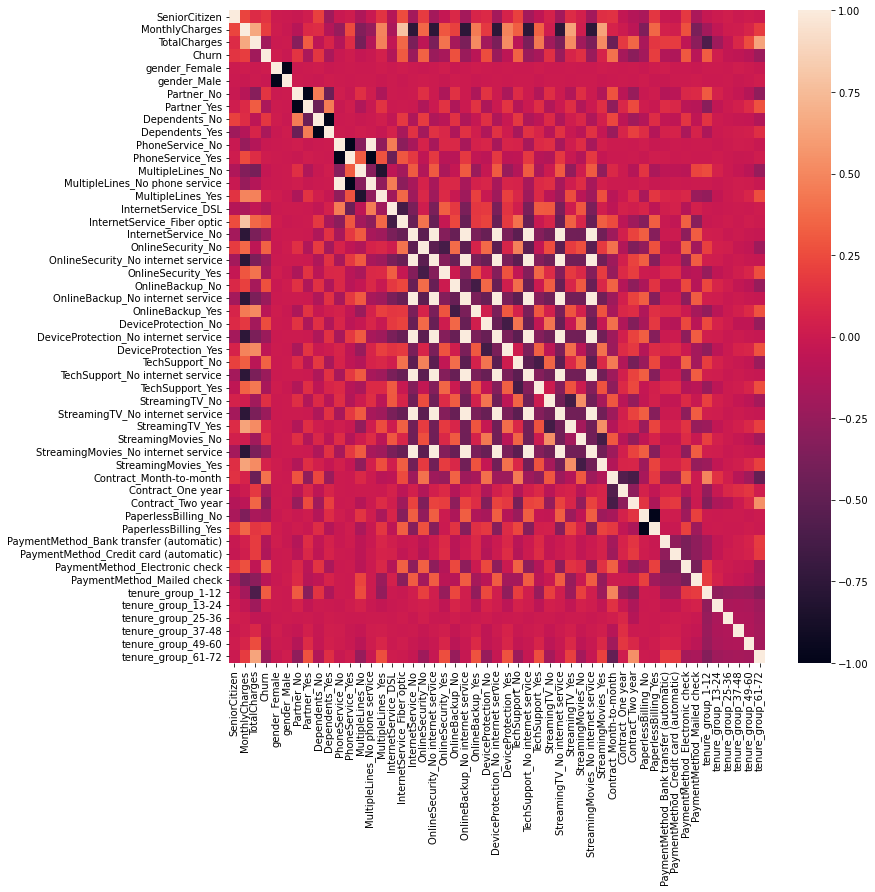

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr())

Electronic medium check are high churners and non senior citizens aer high churners

In [28]:
telco_data_dummies.to_csv('tel_churn.csv')

# Model Building

In [30]:
df_telco=telco_data_dummies.copy()

In [31]:
df_telco.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [32]:
#creating X & Y variable
X=df_telco.drop('Churn',axis=1)
y=df_telco['Churn']

In [33]:
print(X)

      SeniorCitizen  MonthlyCharges  TotalCharges  gender_Female  gender_Male  \
0                 0           29.85         29.85              1            0   
1                 0           56.95       1889.50              0            1   
2                 0           53.85        108.15              0            1   
3                 0           42.30       1840.75              0            1   
4                 0           70.70        151.65              1            0   
...             ...             ...           ...            ...          ...   
7038              0           84.80       1990.50              0            1   
7039              0          103.20       7362.90              1            0   
7040              0           29.60        346.45              1            0   
7041              1           74.40        306.60              0            1   
7042              0          105.65       6844.50              0            1   

      Partner_No  Partner_Y

In [34]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int32


In [35]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.25)

In [37]:
#DecisionTreeClassifier

model=DecisionTreeClassifier(random_state=100, max_depth=6,min_samples_leaf=8)
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [38]:
y_pred=model.predict(X_test)

In [39]:
y_pred

array([0, 0, 1, ..., 0, 0, 1])

In [40]:
print(confusion_matrix(y_test,y_pred))

[[1150  139]
 [ 241  228]]


In [43]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1289
           1       0.62      0.49      0.55       469

    accuracy                           0.78      1758
   macro avg       0.72      0.69      0.70      1758
weighted avg       0.77      0.78      0.77      1758



In [44]:
#upsampling
sm=SMOTEENN()
X_resampled, y_resampled=sm.fit_sample(X,y)

In [45]:
Xr_train, Xr_test, yr_train, yr_test=train_test_split(X_resampled,y_resampled,test_size=0.25)

In [46]:
#DecisionTreeClassifier

model_smote=DecisionTreeClassifier(random_state=100, max_depth=6,min_samples_leaf=8)
model_smote.fit(Xr_train,yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [47]:
y_pred_new=model_smote.predict(Xr_test)

In [48]:
y_pred_new

array([0, 0, 0, ..., 0, 0, 0])

In [49]:
print(metrics.classification_report(yr_test,y_pred_new))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       692
           1       0.95      0.94      0.95       788

    accuracy                           0.94      1480
   macro avg       0.94      0.94      0.94      1480
weighted avg       0.94      0.94      0.94      1480



In [50]:
#saving the model
import pickle

filename='model.save'

In [51]:
pickle.dump(model_smote, open(filename,'wb'))

In [52]:
load_model=pickle.load(open(filename,'rb'))

In [55]:
load_model.score(Xr_test,yr_test)

0.9418918918918919